In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.switch_backend('Agg') # 不弹窗口 直接后台生成图片
import matplotlib
# matplotlib.use('Agg')

%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
file_paths = {
    'Sydney': 'datasets/Sydney_Air_Quality.csv',
    'Cairo': 'datasets/Cairo_Air_Quality.csv',
    'Brasilia': 'datasets/Brasilia_Air_Quality.csv',
    'London': 'datasets/London_Air_Quality.csv',
    'General': 'datasets/Air_Quality.csv',
    'Dubai': 'datasets/Dubai_Air_Quality.csv',
    'New York': 'datasets/New_York_Air_Quality.csv'
}

In [5]:
dataframes = []
for city, path in file_paths.items():
    try:
        df = pd.read_csv(path,encoding='ascii')
        if 'Unnamed: 0' in df.columns:
            df.drop('Unnamed: 0', axis=1,inplace=True)
        dataframes.append(df)
    except Exception as e:
        print(f"Error loading {city} data from {path}: {e}")

df = pd.concat(dataframes, ignore_index=True)
print('Data loaded successfully. Combined shape:', df.shape)


Data loaded successfully. Combined shape: (105120, 9)


In [6]:
try:
    df['Date'] = pd.to_datetime(df['Date'])
except Exception as e:
    print(f"Error converting 'Date' column to datetime: {e}")

In [7]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Date     0
City     0
CO       0
NO2      0
SO2      0
O3       0
PM2.5    0
PM10     0
AQI      0
dtype: int64


In [8]:
df.dropna(inplace=True)


In [9]:
df.reset_index(drop=True, inplace=True)
print("Data shape after cleaning:", df.shape)

Data shape after cleaning: (105120, 9)


In [10]:
# Exploratory Data Analysis

# Display first few rows of the dataframe
print('Preview of the data:')
print(df.head())

# General information about data types and non-null values
print('\nData Info:')
print(df.info())

# Summary statistics for numeric columns
print('\nSummary statistics:')
print(df.describe())

Preview of the data:
                       Date    City    CO   NO2  ...    O3  PM2.5  PM10        AQI
0 2023-01-01 00:00:00+00:00  Sydney  62.0  6.00  ...  41.0    9.2  16.5  23.583336
1 2023-01-01 01:00:00+00:00  Sydney  62.0  5.25  ...  45.0    9.1  16.5  23.466667
2 2023-01-01 02:00:00+00:00  Sydney  61.0  4.15  ...  50.0    8.8  15.9  23.325003
3 2023-01-01 03:00:00+00:00  Sydney  61.0  3.20  ...  55.0    8.8  16.1  23.150002
4 2023-01-01 04:00:00+00:00  Sydney  62.0  3.15  ...  54.0    8.7  16.0  22.958332

[5 rows x 9 columns]

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype              
---  ------  --------------   -----              
 0   Date    105120 non-null  datetime64[ns, UTC]
 1   City    105120 non-null  object             
 2   CO      105120 non-null  float64            
 3   NO2     105120 non-null  float64            
 4   SO2     105120 non-null  float64

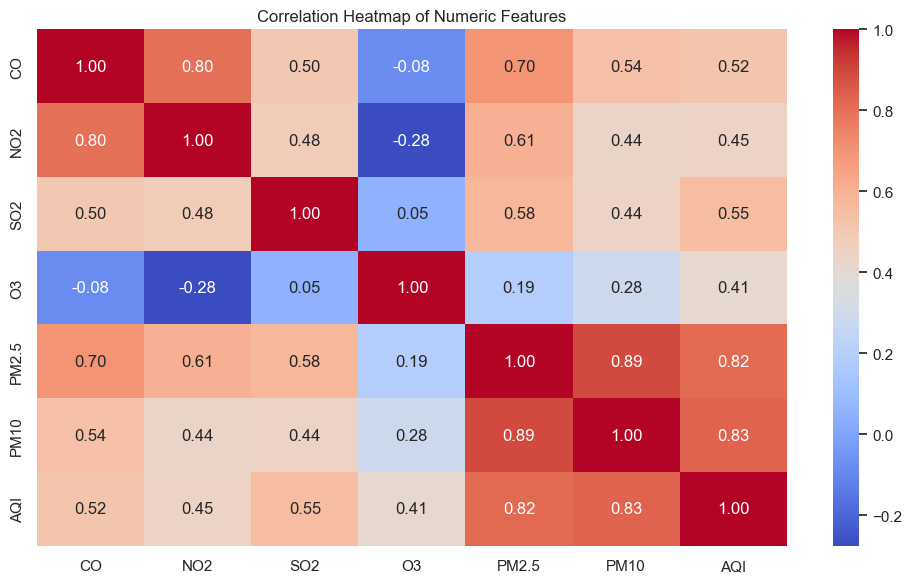

In [13]:
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.Figure(figsize=(12, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, 
                annot=True, 
                cmap='coolwarm', 
                fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns to plot a correlation heatmap.")

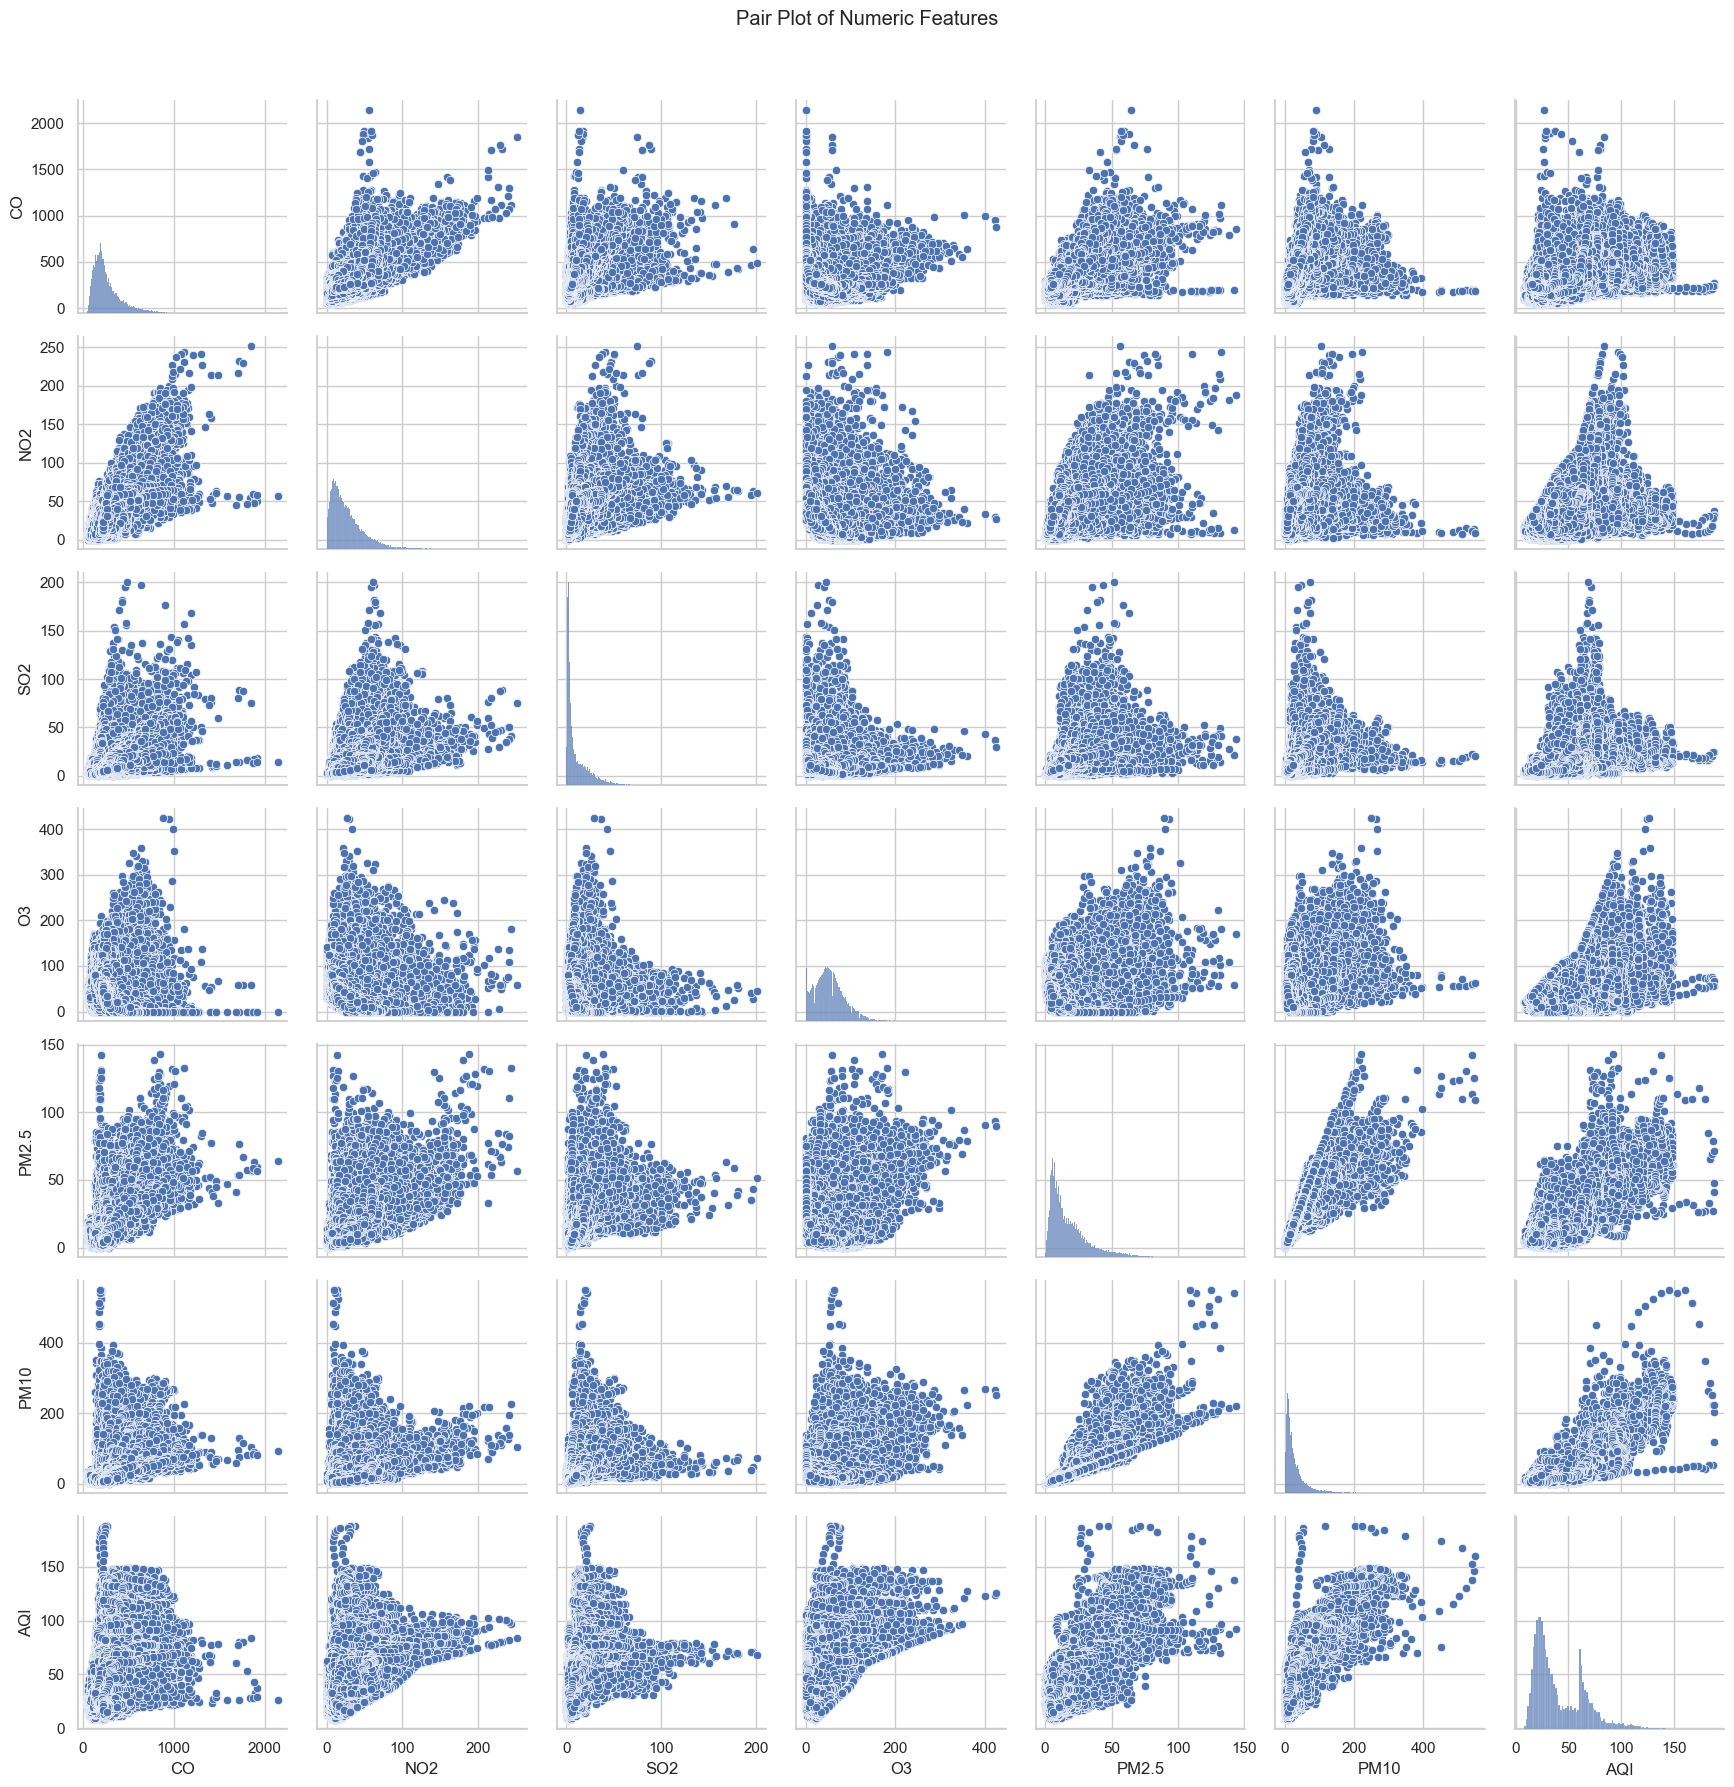

In [14]:
try:
    sns.pairplot(numeric_df)
    plt.suptitle('Pair Plot of Numeric Features', y=1.02)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error creating pair plot: {e}")

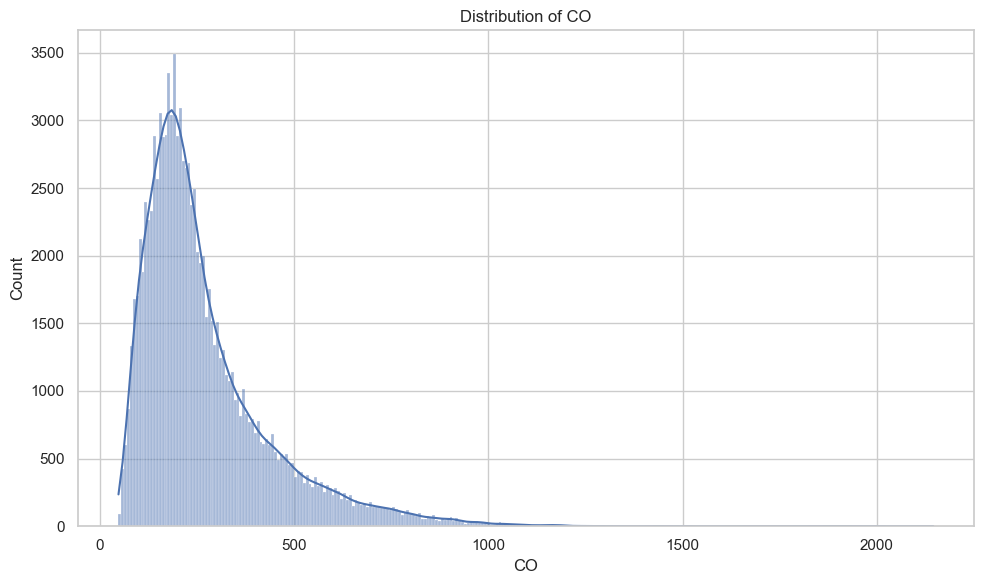

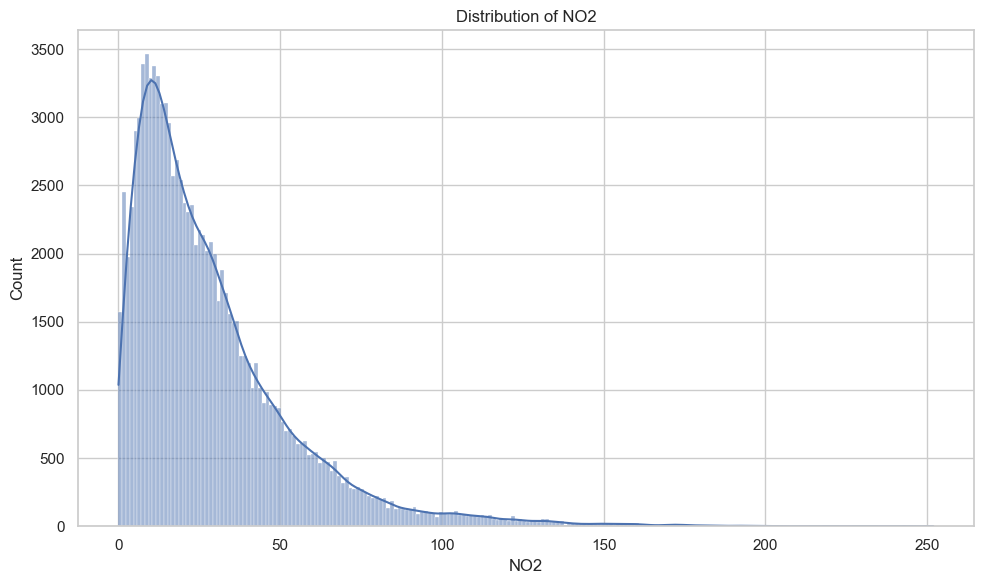

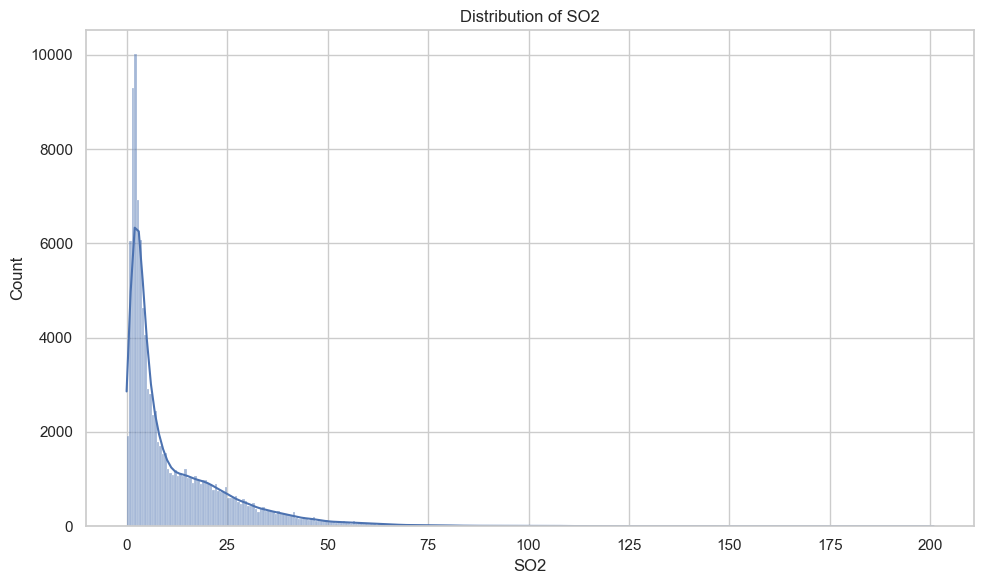

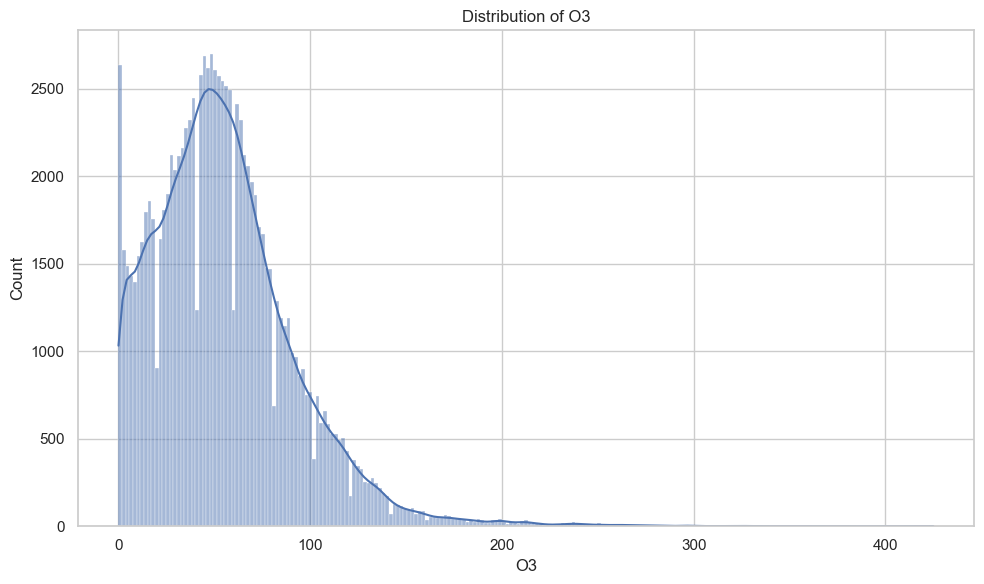

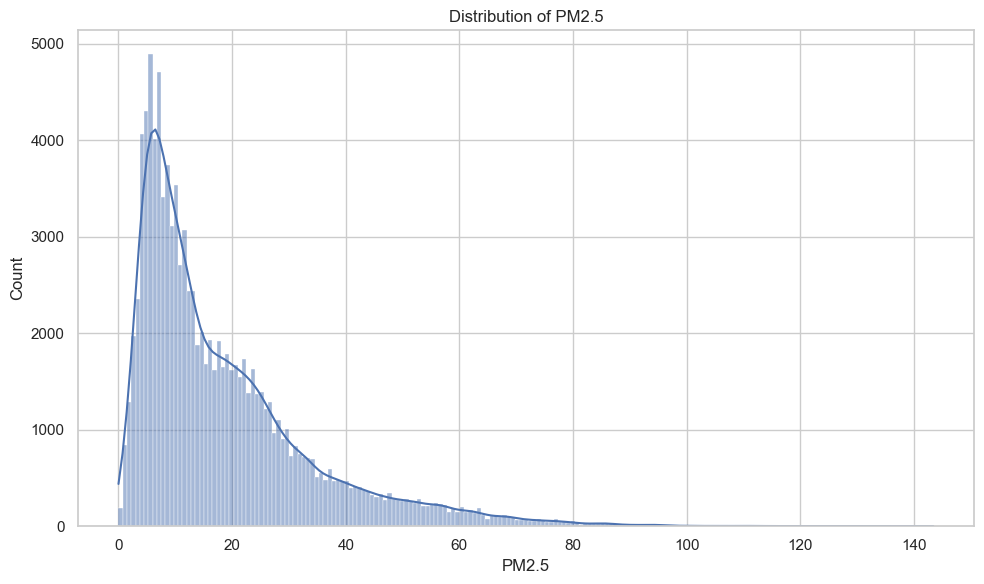

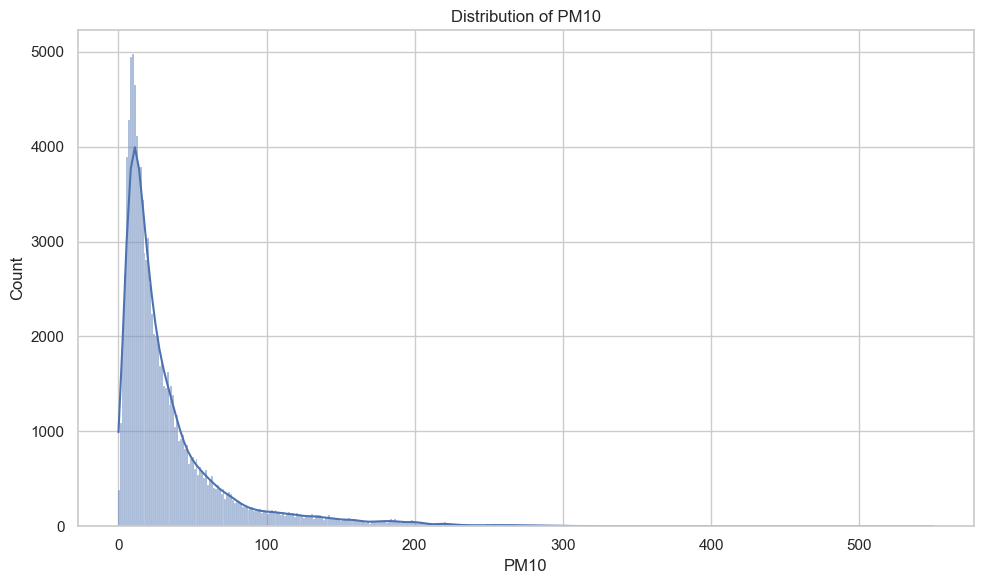

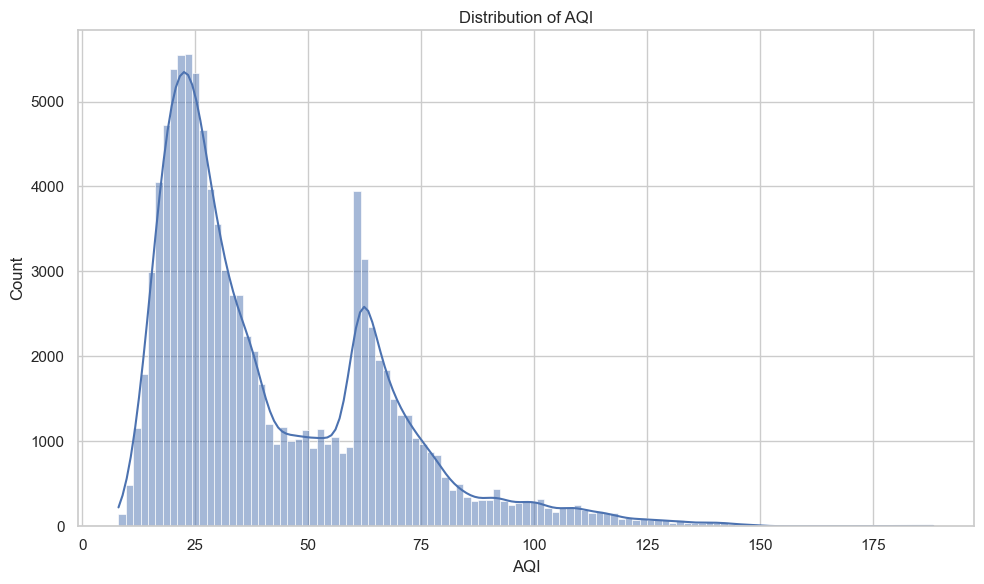

In [15]:
for col in numeric_df.columns:
    plt.figure()
    sns.histplot(numeric_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

R^2 score of the linear regression model: 0.7926


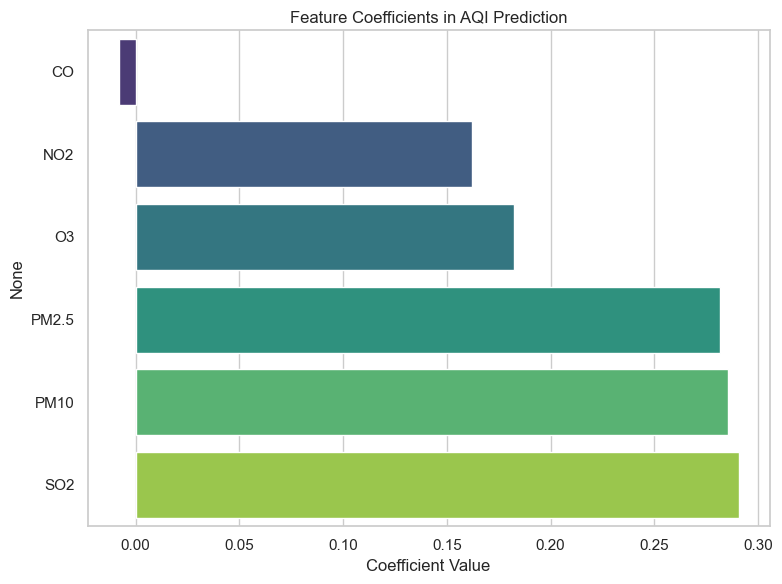

In [ ]:
features_cols = ['CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10']
target_col = 'AQI'

for col in features_cols:
    if col not in df.columns:
        raise ValueError(f"Feature column '{col}' not found in the dataframe.")
    
X = df[features_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R^2 score of the linear regression model: {r2:.4f}")

coefficients = pd.Series(lr_model.coef_, index=features_cols)
coefficients = coefficients.sort_values()

plt.figure(figsize=(8, 6))
sns.barplot(x=coefficients.values, y=coefficients.index, palette='viridis')
plt.title('Feature Coefficients in AQI Prediction')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()



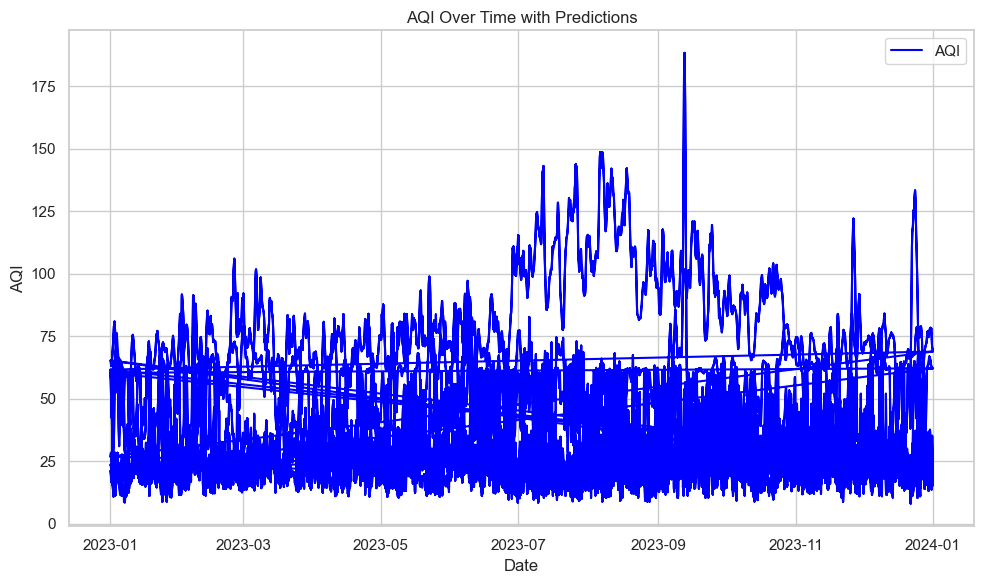

In [51]:
Sydney_data = df[df['City'] == 'Sydney']

In [30]:
Sydney_data

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,2023-01-01 00:00:00+00:00,Sydney,62.0,6.00,3.65,41.0,9.2,16.5,23.583336
1,2023-01-01 01:00:00+00:00,Sydney,62.0,5.25,3.45,45.0,9.1,16.5,23.466667
2,2023-01-01 02:00:00+00:00,Sydney,61.0,4.15,3.20,50.0,8.8,15.9,23.325003
3,2023-01-01 03:00:00+00:00,Sydney,61.0,3.20,2.90,55.0,8.8,16.1,23.150002
4,2023-01-01 04:00:00+00:00,Sydney,62.0,3.15,2.80,54.0,8.7,16.0,22.958332
...,...,...,...,...,...,...,...,...,...
87595,2023-12-31 19:00:00+00:00,Sydney,74.0,8.30,3.50,25.0,11.0,20.0,25.341667
87596,2023-12-31 20:00:00+00:00,Sydney,75.0,8.20,3.90,25.0,12.0,21.9,25.200003
87597,2023-12-31 21:00:00+00:00,Sydney,76.0,7.90,4.20,26.0,14.5,26.7,25.133339
87598,2023-12-31 22:00:00+00:00,Sydney,77.0,7.40,4.40,28.0,13.5,24.7,25.116669


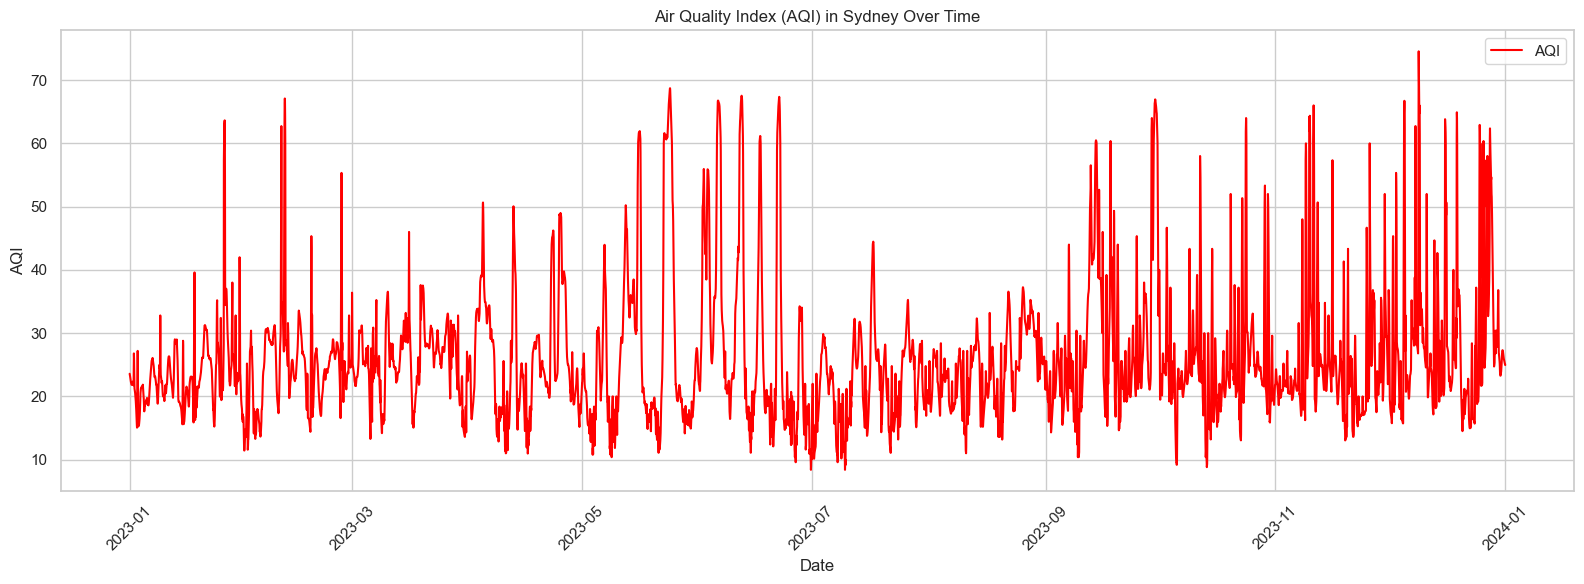

In [55]:
plt.figure(figsize=(16, 6))
plt.plot(Sydney_data['Date'], Sydney_data['AQI'], label='AQI', color='red')
plt.title('Air Quality Index (AQI) in Sydney Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [53]:
Sydney_data['Date'] = pd.to_datetime(Sydney_data['Date'])
Sydney_data.sort_values('Date', inplace=True)

In [54]:
Sydney_feature = Sydney_data[features_cols]
Sydney_target = Sydney_data[target_col]

In [56]:
SEQ_LEN = 24
X, y = [], []
for i in range(len(Sydney_feature) - SEQ_LEN):
    X.append(Sydney_feature.iloc[i:i + SEQ_LEN].values)
    y.append(Sydney_target.iloc[i + SEQ_LEN])
X = np.array(X)
y = np.array(y)

X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)



In [57]:


# 划分训练测试
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


# CNN-LSTM 框架

In [60]:
import torch
from torch import nn

class CNNLSTM(nn.Module):
    def __init__(self, in_channels=1, feature_dim=6, seq_len=24, hidden_dim=64):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=(1, 3), padding=(0, 1)),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=(1, 3), padding=(0, 1)),
            nn.ReLU()
        )
        self.lstm = nn.LSTM(32 * feature_dim, 64, batch_first=True)
        self.fc = nn.Linear(64, 1)

    def forward(self, x):
        B, T, F, C = x.shape
        x = x.view(B * T, C, 1, F)
        x = self.conv(x).squeeze(2)  # (B*T, 通道, 特征)
        x = x.view(B, T, -1)
        _, (h_n, _) = self.lstm(x)
        out = self.fc(h_n[-1])
        return out.squeeze()



In [64]:
model = CNNLSTM()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).squeeze()

for epoch in range(3000):
    model.train()
    optimizer.zero_grad()
    preds = model(X_train_tensor)
    loss = loss_fn(preds, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 10, Loss: 668.1318
Epoch 20, Loss: 608.7201
Epoch 30, Loss: 576.0194
Epoch 40, Loss: 544.8180
Epoch 50, Loss: 519.0535
Epoch 60, Loss: 494.6974
Epoch 70, Loss: 463.7921
Epoch 80, Loss: 435.1097
Epoch 90, Loss: 411.5016
Epoch 100, Loss: 387.7053
Epoch 110, Loss: 367.5073
Epoch 120, Loss: 348.7842
Epoch 130, Loss: 331.3886
Epoch 140, Loss: 313.1768
Epoch 150, Loss: 297.1083
Epoch 160, Loss: 280.7952
Epoch 170, Loss: 266.8342
Epoch 180, Loss: 253.8781
Epoch 190, Loss: 241.8551
Epoch 200, Loss: 230.6939
Epoch 210, Loss: 220.3302
Epoch 220, Loss: 210.7076
Epoch 230, Loss: 201.7759
Epoch 240, Loss: 193.4898
Epoch 250, Loss: 185.8078
Epoch 260, Loss: 178.6918
Epoch 270, Loss: 172.1064
Epoch 280, Loss: 166.0180
Epoch 290, Loss: 160.3958
Epoch 300, Loss: 155.2098
Epoch 310, Loss: 150.4324
Epoch 320, Loss: 146.0369
Epoch 330, Loss: 141.9982
Epoch 340, Loss: 138.2925
Epoch 350, Loss: 134.8972
Epoch 360, Loss: 131.7906
Epoch 370, Loss: 128.9526
Epoch 380, Loss: 126.3637
Epoch 390, Loss: 124.

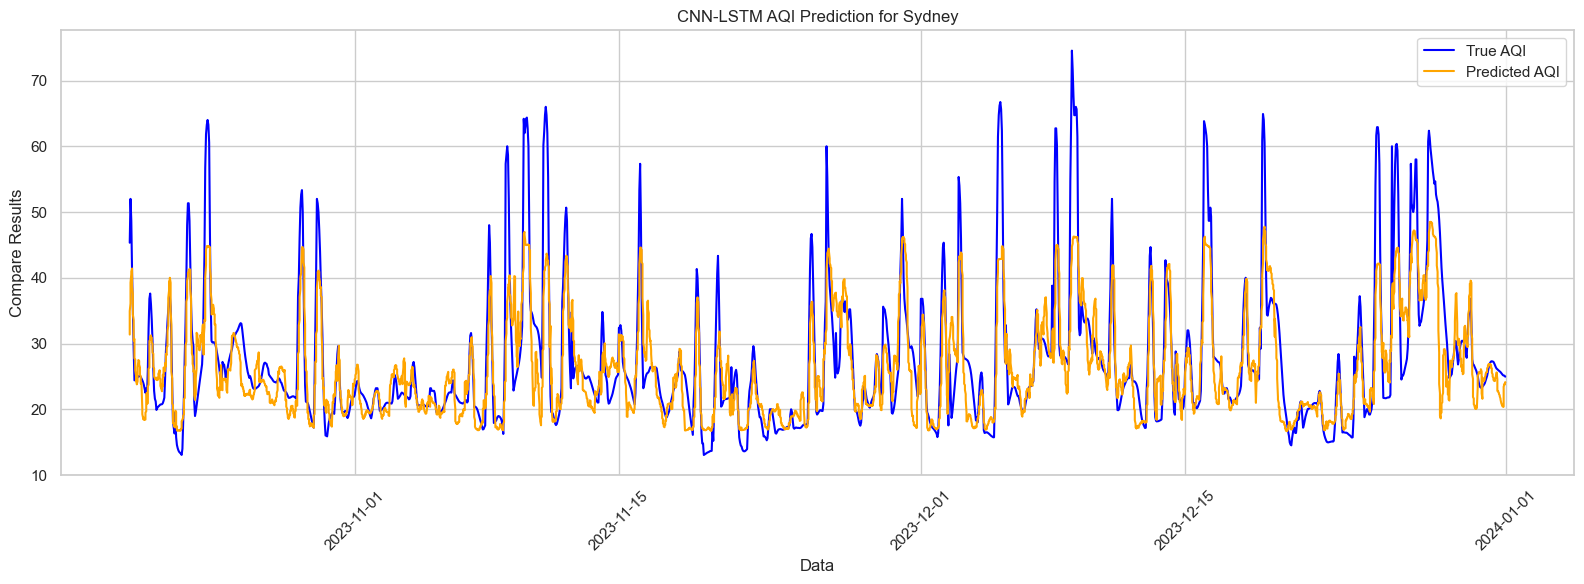

In [71]:
model.eval()
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).squeeze()
preds = model(X_test_tensor)
preds = preds.detach().numpy()

plt.figure(figsize=(16, 6))
plt.plot(Sydney_data['Date'].iloc[-len(y_test):], y_test, label='True AQI', color='blue')
plt.plot(Sydney_data['Date'].iloc[-len(y_test):], preds, label='Predicted AQI', color='orange')
plt.xlabel('Data')
plt.ylabel('Compare Results')
plt.title('CNN-LSTM AQI Prediction for Sydney')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [85]:
London_data = df[df['City'] == 'London']
London_feature = London_data[features_cols]
London_target = London_data[target_col]

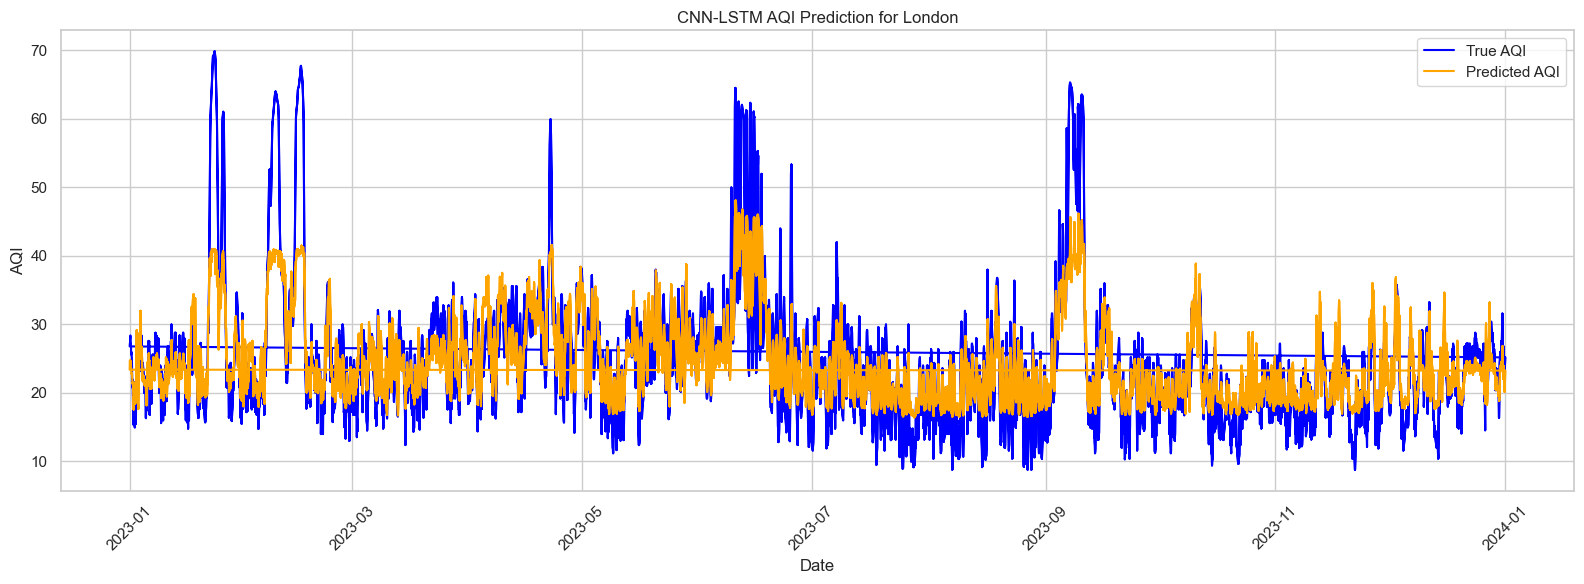

In [90]:
X_ld, y_ld = [], []
for i in range(len(London_feature) - SEQ_LEN):
    X_ld.append(London_feature.iloc[i:i + SEQ_LEN].values)
    y_ld.append(London_target.iloc[i + SEQ_LEN])

X_ld = np.array(X_ld)
y_ld = np.array(y_ld)

X_ld = X_ld.reshape(X_ld.shape[0], X_ld.shape[1], X_ld.shape[2], 1)

model.eval()
London_feature_tensor = torch.tensor(X_ld, dtype=torch.float32)
London_preds = model(London_feature_tensor).detach().numpy()

date_slice = London_data['Date'].iloc[SEQ_LEN:].values

plt.figure(figsize=(16, 6))
plt.plot(date_slice, y_ld, label='True AQI', color='blue')
plt.plot(date_slice, London_preds, label='Predicted AQI', color='orange')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('CNN-LSTM AQI Prediction for London')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [88]:
y_ld.shape

(17496,)